In [348]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib.ticker import EngFormatter, PercentFormatter, MultipleLocator
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import imblearn
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
#Import data

df1 = pd.read_csv("Variant I.csv")

In [6]:
df1.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.6,0.252681,-1,188,20,0.021614,-0.266603,AC,2596,...,0,1000.0,1,INTERNET,7.634858,linux,0,1,0,5
1,0,0.9,0.185206,-1,51,30,0.001696,-1.191015,AD,898,...,0,1500.0,0,INTERNET,5.408299,other,0,1,0,4
2,0,0.1,0.505509,-1,187,20,0.011880,-1.252679,AB,2851,...,0,500.0,0,INTERNET,9.401087,linux,1,1,0,5
3,0,0.2,0.612030,-1,55,20,0.001582,-3.001035,AA,4035,...,0,200.0,0,INTERNET,4.165579,linux,0,1,0,1
4,0,0.4,0.592596,319,68,30,0.011189,-0.729188,AB,1611,...,0,200.0,1,INTERNET,8.971943,linux,0,1,0,5


In [7]:
df1.tail()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
999995,0,0.1,0.237534,30,42,20,0.008898,-1.188112,AC,636,...,0,500.0,0,INTERNET,3.188296,other,0,1,0,3
999996,0,0.6,0.917942,-1,242,20,0.020913,-1.518733,AB,1264,...,0,1000.0,0,INTERNET,7.346804,other,0,1,0,6
999997,0,0.1,0.861117,91,5,30,17.555226,-1.074359,AC,1490,...,1,200.0,0,INTERNET,2.953589,other,0,1,0,3
999998,0,0.6,0.933076,-1,367,40,0.001743,-0.541853,AB,1269,...,0,200.0,0,INTERNET,6.583590,other,1,1,0,4
999999,0,0.1,0.514556,-1,88,40,0.025540,-1.026764,AB,1852,...,0,200.0,0,INTERNET,22.287921,windows,1,1,0,3


In [8]:
df1.keys()

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [9]:
df1.shape

(1000000, 32)

In [10]:
#No missing data

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

## Unique Values & Encoding Object Data

In [11]:
df1['source'].unique()

array(['INTERNET', 'TELEAPP'], dtype=object)

In [12]:
df1['device_os'].unique()

array(['linux', 'other', 'windows', 'macintosh', 'x11'], dtype=object)

In [13]:
df1['payment_type'].unique()

array(['AC', 'AD', 'AB', 'AA', 'AE'], dtype=object)

In [14]:
df1['housing_status'].unique()

array(['BB', 'BC', 'BE', 'BA', 'BD', 'BF', 'BG'], dtype=object)

In [15]:
df1['employment_status'].unique()

array(['CB', 'CA', 'CE', 'CC', 'CD', 'CF', 'CG'], dtype=object)

In [16]:
df = df1

cat_feats = ['source', 'device_os', 'payment_type', 'housing_status','employment_status']

df = pd.get_dummies(df1, columns=cat_feats, drop_first=True)

df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG
0,0,0.6,0.252681,-1,188,20,0.021614,-0.266603,2596,11237.202503,...,0,0,0,0,1,0,0,0,0,0
1,0,0.9,0.185206,-1,51,30,0.001696,-1.191015,898,6811.421858,...,0,0,0,0,1,0,0,0,0,0
2,0,0.1,0.505509,-1,187,20,0.011880,-1.252679,2851,8425.498770,...,0,1,0,0,0,0,0,0,0,0
3,0,0.2,0.612030,-1,55,20,0.001582,-3.001035,4035,8513.696191,...,0,1,0,0,1,0,0,0,0,0
4,0,0.4,0.592596,319,68,30,0.011189,-0.729188,1611,4226.142238,...,0,0,0,0,1,0,0,0,0,0


## Visualizing fraud_bool Column

0    988971
1     11029
Name: fraud_bool, dtype: int64


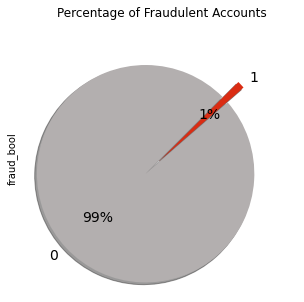

In [17]:
# There are 988,971 legitimate bank accounts in the dataset which are represented by 0 in the fraud_bool column
# There are 11,029 fraduluent bank accounts in the dataset which are represented by 1 in the fraud_bool column
# 1.1029% of the bank accounts are fraudulent, while 98.8971% are ligitimate
# Class Imbalance: Because fraud only makes up about 1% of the dataset, there probably won't be too many significant insights
# Machine Learning Algo may become bias to majority class

fraud_val_counts = df['fraud_bool'].value_counts()

print(fraud_val_counts)

explode = [0.2, 0]
df.fraud_bool.value_counts().plot.pie(y='fraud_bool', figsize=(5, 5), autopct='%1.0f%%', colors = ['#B3AFAF', '#DA2C13'], explode= explode, startangle= 45, shadow=True, textprops={'fontsize': 14})
plt.title("Percentage of Fraudulent Accounts")
plt.show()

## Visualizattions with HeatMaps

<AxesSubplot: title={'center': 'Bank  Fraud'}>

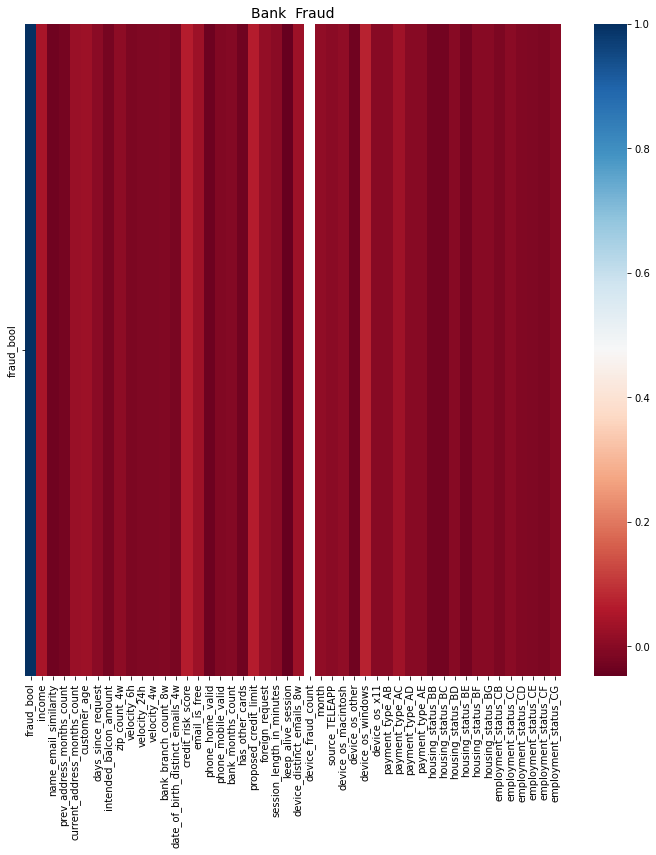

In [18]:
plt.figure(figsize=(12,12))
plt.title("Bank  Fraud", fontsize="14")
sns.heatmap(df.corr().loc[['fraud_bool'],:], cmap="RdBu")

Text(0.5, 1.0, 'Bank Fraud Detection')

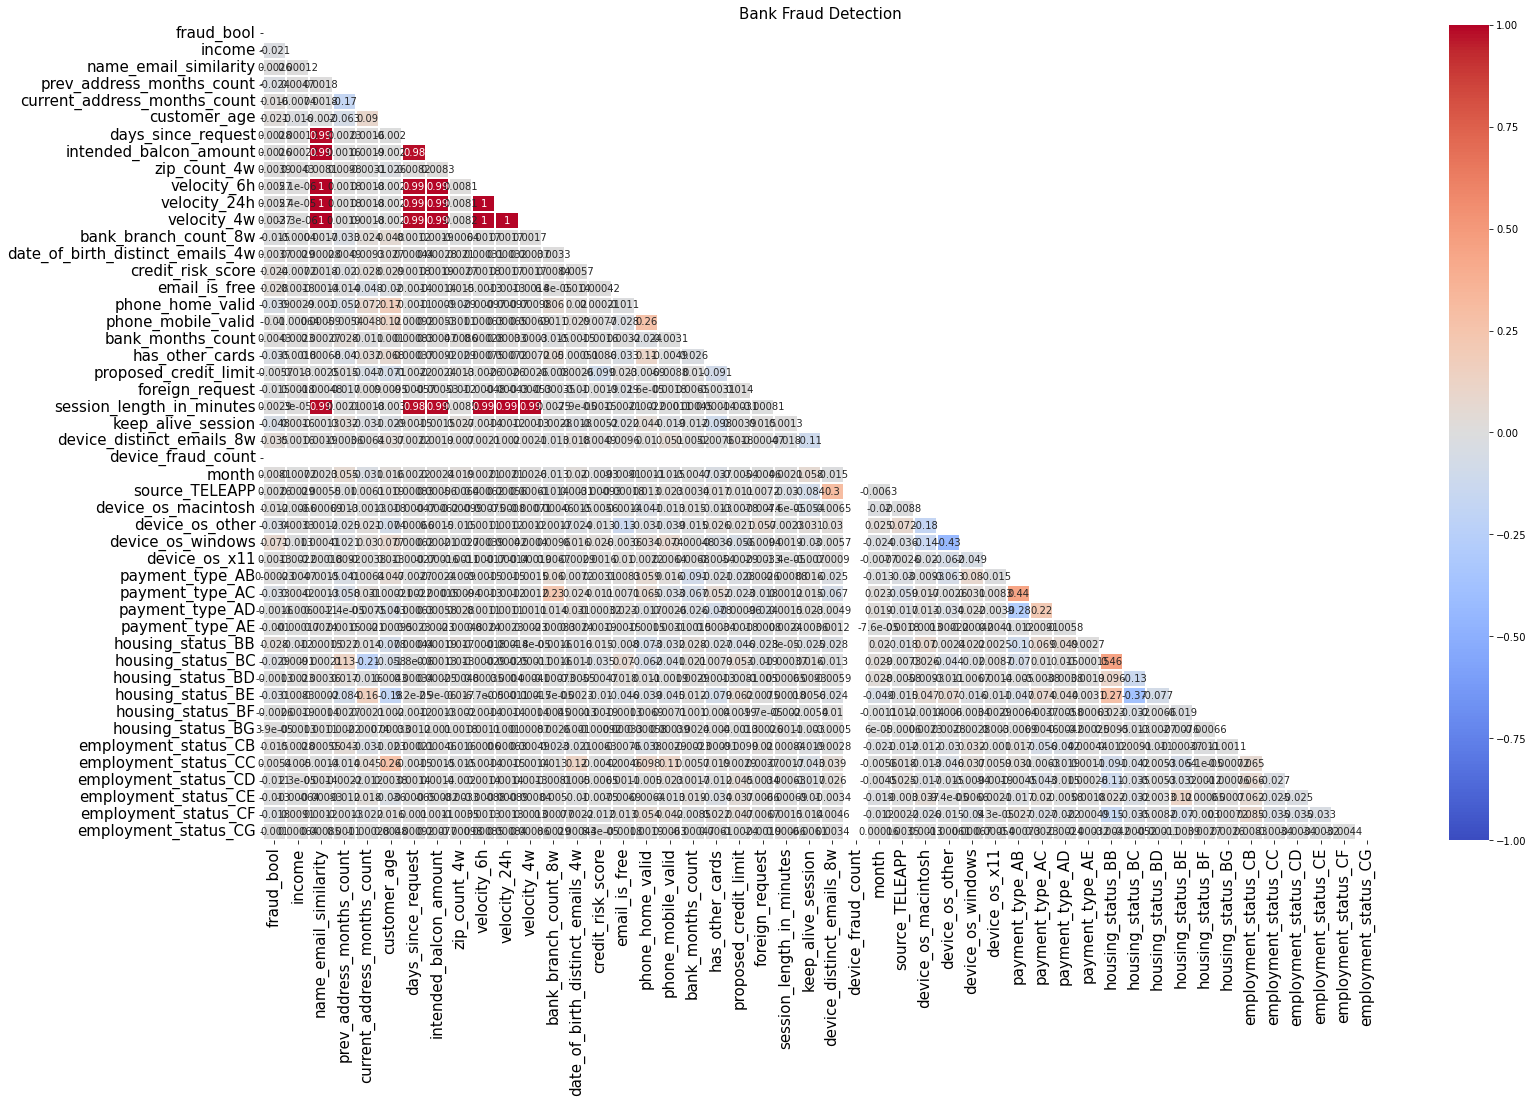

In [19]:
plt.figure(5, figsize=(25, 15))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Bank Fraud Detection", fontsize="15")

In [20]:
# sns.pairplot(df,hue='fraud_bool',palette='Set1')

In [21]:
col = df['session_length_in_minutes']
count = df.groupby('session_length_in_minutes').size()

print("Frequency of values in column ", col, "is:", count)

Frequency of values in column  0          7.634858
1          5.408299
2          9.401087
3          4.165579
4          8.971943
            ...    
999995     3.188296
999996     7.346804
999997     2.953589
999998     6.583590
999999    22.287921
Name: session_length_in_minutes, Length: 1000000, dtype: float64 is: session_length_in_minutes
-1.000000     1842
 0.000047        1
 0.000095        1
 0.001224        1
 0.001500        1
              ... 
 83.376775       1
 84.178608       1
 84.987829       1
 85.161998       1
 85.567848       1
Length: 995199, dtype: int64


# Counts of fraud by email similarity

In [22]:
# plt.figure(figsize=(11,7))
# sns.countplot(x='name_email_similarity', hue='fraud_bool', data=df, palette='Set1')

## Distribution Histograms of Important Features (per Random Forest Results)

Text(0.5, 0, 'name_email_similarity')

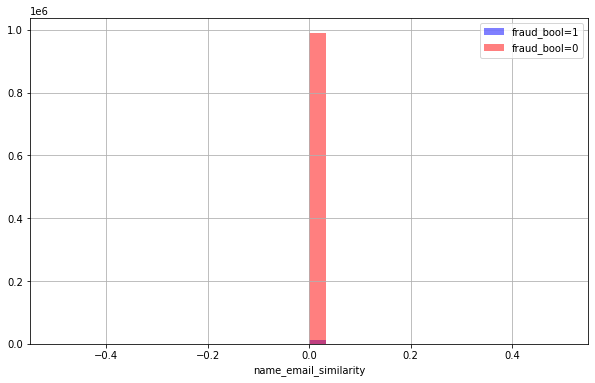

In [23]:
plt.figure(figsize=(10,6))

df[df['fraud_bool']==1]['device_fraud_count'].hist(alpha=0.5,color='blue', bins=30,label='fraud_bool=1')
df[df['fraud_bool']==0]['device_fraud_count'].hist(alpha=0.5,color='red',bins=30,label='fraud_bool=0')

plt.legend()
plt.xlabel('name_email_similarity')

Text(0.5, 0, 'name_email_similarity')

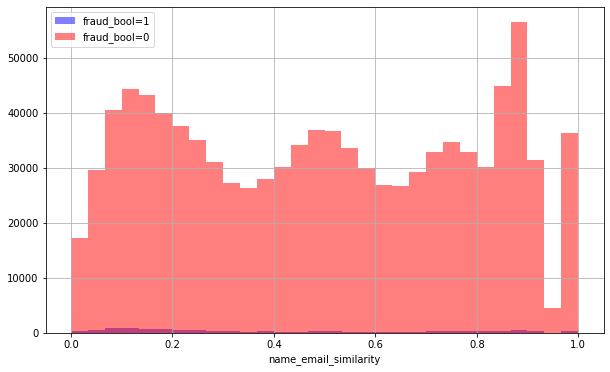

In [24]:
plt.figure(figsize=(10,6))

df[df['fraud_bool']==1]['name_email_similarity'].hist(alpha=0.5,color='blue', bins=30,label='fraud_bool=1')
df[df['fraud_bool']==0]['name_email_similarity'].hist(alpha=0.5,color='red',bins=30,label='fraud_bool=0')

plt.legend()
plt.xlabel('name_email_similarity')

Text(0.5, 0, 'zip_count_4w')

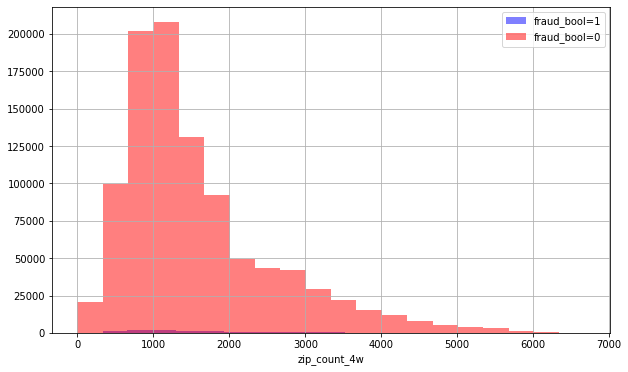

In [25]:
plt.figure(figsize=(10,6))

df[df['fraud_bool']==1]['zip_count_4w'].hist(alpha=0.5,color='blue', bins=20,label='fraud_bool=1')
df[df['fraud_bool']==0]['zip_count_4w'].hist(alpha=0.5,color='red',bins=20,label='fraud_bool=0')

plt.legend()
plt.xlabel('zip_count_4w')

## Outliers

Text(0.5, 1.0, 'Distribution of Data')

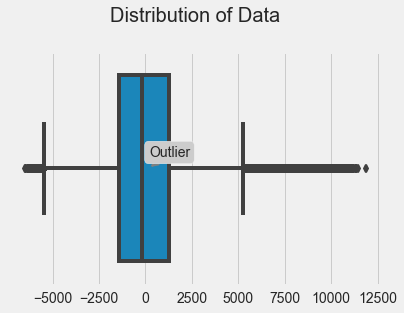

In [335]:
plot = sns.boxplot(df)


plot.annotate('Outlier', xy=(190,0), xytext=(186,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))


plt.xticks(fontsize=14)
plt.title('Distribution of Data', fontsize=20)

## Trend between Fraud score and interest rate

# No relationship

sns.jointplot(x='fraud_bool', y='days_since_request', data=df, color='purple')

# Mean

In [315]:
fraud = df1[df1["fraud_bool"]==1]
legit = df1[df1['fraud_bool']==0]
          

In [317]:
fraud['customer_age'].mean()

34.91885030374468

In [318]:
legit['customer_age'].mean()

31.94136127348527

In [321]:
fraud['prev_address_months_count'].mean()

7.094296853749206

In [322]:
legit['prev_address_months_count'].mean()

17.0701436139179

In [323]:
fraud['current_address_months_count'].mean()

102.42116239006256

In [324]:
legit['current_address_months_count'].mean()

83.37533557606847

In [326]:
fraud['income'].mean()

0.6847311632967632

In [325]:
legit['income'].mean()

0.559485566310842

In [327]:
fraud['credit_risk_score'].mean()

172.23202466225405

In [328]:
legit['credit_risk_score'].mean()

128.93677468803432

In [ ]:
fraud['credit_risk_score'].mean()

In [340]:
fraud.corr()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
fraud_bool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,NaN,1.000000,-0.017717,0.013468,-0.013212,0.081877,-0.008834,0.003338,-0.079538,-0.088131,...,0.028030,-0.021058,0.032289,0.157444,0.001597,-0.052146,-0.041375,-0.040315,NaN,0.110487
name_email_similarity,NaN,-0.017717,1.000000,-0.023441,0.031090,-0.013522,-0.018340,0.021860,0.023268,0.020450,...,-0.004620,-0.038374,0.011191,0.093086,-0.009428,0.019448,0.040148,-0.031678,NaN,-0.053848
prev_address_months_count,NaN,0.013468,-0.023441,1.000000,-0.199437,-0.063119,0.086033,-0.003819,-0.039982,0.012086,...,-0.002742,-0.034811,-0.018029,-0.017362,0.029409,0.035685,0.006425,0.025899,NaN,-0.009165
current_address_months_count,NaN,-0.013212,0.031090,-0.199437,1.000000,0.155773,-0.041453,0.027153,0.007359,0.017791,...,-0.072488,0.021239,0.042751,0.113645,-0.016253,-0.005115,-0.043567,-0.023432,NaN,-0.020371
customer_age,NaN,0.081877,-0.013522,-0.063119,0.155773,1.000000,-0.040817,-0.018957,-0.016304,-0.028891,...,-0.088301,-0.012410,0.046270,0.166193,-0.013884,0.011534,-0.040747,0.017545,NaN,0.028983
days_since_request,NaN,-0.008834,-0.018340,0.086033,-0.041453,-0.040817,1.000000,0.019851,0.006875,0.040268,...,0.002129,-0.050632,-0.030946,-0.074765,-0.002923,0.041176,0.006288,0.016709,NaN,-0.029739
intended_balcon_amount,NaN,0.003338,0.021860,-0.003819,0.027153,-0.018957,0.019851,1.000000,0.041120,0.055024,...,0.045471,0.144013,0.068661,-0.013797,0.023928,0.033372,0.015449,-0.035652,NaN,-0.100950
zip_count_4w,NaN,-0.079538,0.023268,-0.039982,0.007359,-0.016304,0.006875,0.041120,1.000000,0.128765,...,-0.012147,0.055936,0.004877,-0.038076,0.011452,0.021608,0.018301,0.032672,NaN,-0.282681
velocity_6h,NaN,-0.088131,0.020450,0.012086,0.017791,-0.028891,0.040268,0.055024,0.128765,1.000000,...,-0.039110,0.021186,0.017540,-0.074910,0.001004,0.046477,0.000393,0.052377,NaN,-0.420180


In [342]:
scatter_matrix(fraud, figsize=(16,12), alpha=0)

array([[<AxesSubplot: xlabel='fraud_bool', ylabel='fraud_bool'>,
        <AxesSubplot: xlabel='income', ylabel='fraud_bool'>,
        <AxesSubplot: xlabel='name_email_similarity', ylabel='fraud_bool'>,
        <AxesSubplot: xlabel='prev_address_months_count', ylabel='fraud_bool'>,
        <AxesSubplot: xlabel='current_address_months_count', ylabel='fraud_bool'>,
        <AxesSubplot: xlabel='customer_age', ylabel='fraud_bool'>,
        <AxesSubplot: xlabel='days_since_request', ylabel='fraud_bool'>,
        <AxesSubplot: xlabel='intended_balcon_amount', ylabel='fraud_bool'>,
        <AxesSubplot: xlabel='zip_count_4w', ylabel='fraud_bool'>,
        <AxesSubplot: xlabel='velocity_6h', ylabel='fraud_bool'>,
        <AxesSubplot: xlabel='velocity_24h', ylabel='fraud_bool'>,
        <AxesSubplot: xlabel='velocity_4w', ylabel='fraud_bool'>,
        <AxesSubplot: xlabel='bank_branch_count_8w', ylabel='fraud_bool'>,
        <AxesSubplot: xlabel='date_of_birth_distinct_emails_4w', ylabel='frau

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Error in callback <function flush_figures at 0x000002810D7B7310> (for post_execute):


KeyboardInterrupt: 

# Train, Test, Split

In [232]:
#Train Test Split
# Target = 'fraud_bool'


X = df.drop(['fraud_bool'], axis=1)
Y = df['fraud_bool']

#Reference code: https://www.kaggle.com/code/lennart4711/baselinemodels-roc
# "Train test split by 'month', month 0-5 are train, 6-7 are test data as proposed in the paper"

X_train = X[X['month']<6]
X_test = X[X['month']>=6]
Y_train = Y[X['month']<6]
Y_test = Y[X['month']>=6]

X_train.drop('month', axis=1, inplace=True)
X_test.drop('month', axis=1, inplace=True)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train", X_train.shape, "\nX_test", X_test.shape, "\nY_train", Y_train.shape, "\nY_test", Y_test.shape)

X_train (794990, 46) 
X_test (205010, 46) 
Y_train (794990,) 
Y_test (205010,)


## Random Forrest

In [233]:
# param_grid = {'n_estimators': [100, 200, 300]}

# randon_forest_model = RandomForestClassifier(random_state=42)

# grid_search = GridSearchCV(randon_forest_model, param_grid=param_grid, cv=10, scoring='f1_macro', n_jobs=4)

# grid_search.fit(X_train, Y_train)

# best_params = grid_search.best_params_ 

# randon_forest_model = RandomForestClassifier(best_params)

randon_forest_model = RandomForestClassifier(n_estimators=200)

randon_forest_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

In [234]:
randon_forest_model.score(X_test, Y_test)

0.9860006828935174

In [235]:
randon_forest_predicted = randon_forest_model.predict(X_test)

randon_forest_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [236]:
rf_cm = confusion_matrix(Y_test, randon_forest_predicted)

print("Random Forest Confusion Matrix")
rf_cm

Random Forest Confusion Matrix


array([[202126,      6],
       [  2864,     14]], dtype=int64)

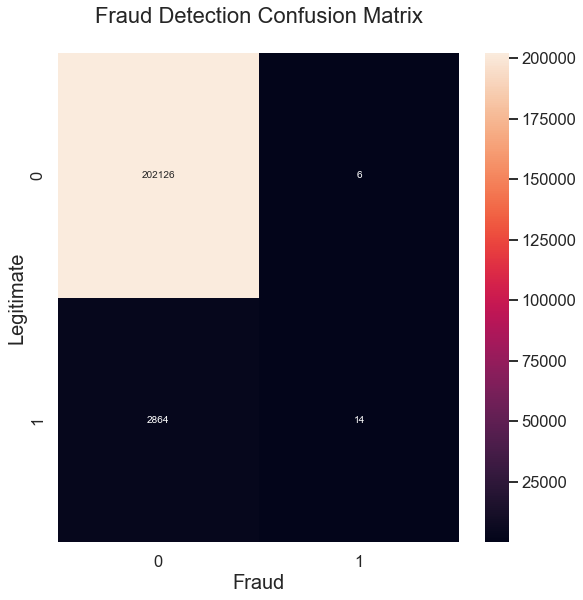

In [237]:
plt.figure(figsize=(9,9))
sns.heatmap(rf_cm, annot=True, fmt="")
plt.title("Fraud Detection Confusion Matrix")
plt.ylabel("Legitimate")
plt.xlabel("Fraud")
plt.show()

In [238]:
important = randon_forest_model.feature_importances_

sorted_indices = np.argsort(important)[::-1]
 
feat_labels = X.columns
 
for f in range(X_train.shape[1]):
    print(f"Feature Importance: '{feat_labels[f]}' is {round(important[f] * 100, 2)}%.")

Feature Importance: 'income' is 2.5%.
Feature Importance: 'name_email_similarity' is 7.5%.
Feature Importance: 'prev_address_months_count' is 0.98%.
Feature Importance: 'current_address_months_count' is 5.94%.
Feature Importance: 'customer_age' is 2.3%.
Feature Importance: 'days_since_request' is 7.15%.
Feature Importance: 'intended_balcon_amount' is 6.8%.
Feature Importance: 'zip_count_4w' is 6.67%.
Feature Importance: 'velocity_6h' is 6.83%.
Feature Importance: 'velocity_24h' is 6.71%.
Feature Importance: 'velocity_4w' is 7.22%.
Feature Importance: 'bank_branch_count_8w' is 4.02%.
Feature Importance: 'date_of_birth_distinct_emails_4w' is 4.53%.
Feature Importance: 'credit_risk_score' is 6.88%.
Feature Importance: 'email_is_free' is 0.89%.
Feature Importance: 'phone_home_valid' is 0.67%.
Feature Importance: 'phone_mobile_valid' is 0.75%.
Feature Importance: 'bank_months_count' is 2.82%.
Feature Importance: 'has_other_cards' is 0.52%.
Feature Importance: 'proposed_credit_limit' is 2.55

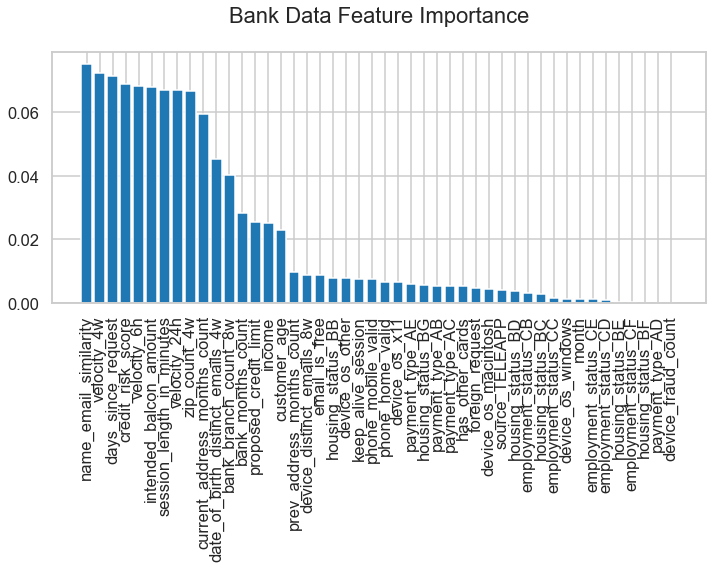

In [239]:
# https://vitalflux.com/feature-importance-random-forest-classifier-python/

plt.figure(figsize=(10,8))
plt.title('Bank Data Feature Importance')
plt.bar(range(X_train.shape[1]), important[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

## Naive Bayes

In [35]:
X_data = df.drop(['fraud_bool'], axis=1)
Y_target = df['fraud_bool']

NB_X_train, NB_X_test, NB_y_train, NB_y_test = train_test_split(X_data, Y_target, test_size=0.3,random_state=109)

In [36]:
gnb = GaussianNB()


gnb.fit(NB_X_train, NB_y_train)


NB_y_pred = gnb.predict(NB_X_test)

In [37]:
print("Accuracy:", metrics.accuracy_score(NB_y_test, NB_y_pred))

Accuracy: 0.9242633333333333


## D Tree

In [319]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
    
dtree = DecisionTreeClassifier()

print(); print(cross_val_score(dtree, X, Y, scoring="accuracy", cv = 7))
mean_score = cross_val_score(dtree, X, Y, scoring="accuracy", cv = 7).mean()
std_score = cross_val_score(dtree, X, Y, scoring="accuracy", cv = 7).std()
print(mean_score)
print(std_score)


[0.97684414 0.97695598 0.97750898 0.97638198 0.97697698 0.97619298
 0.97689298]
0.9768380003158593
0.0003076443547353899


## K-Means

In [38]:
df_KMeans= df1.apply(LabelEncoder().fit_transform)

In [39]:
X = df_KMeans

y= df_KMeans['customer_age']

#X.head()

In [40]:
cols = X.columns

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [41]:
X = pd.DataFrame(X, columns=[cols])

In [42]:
kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [43]:
kmeans.cluster_centers_

array([[1.43811060e-02, 5.68266520e-01, 5.00208650e-01, 4.78047320e-02,
        1.81263737e-01, 2.53238331e-01, 5.00878000e-01, 5.01497753e-01,
        3.18025364e-01, 2.54292880e-01, 5.10387597e-01, 5.14689393e-01,
        5.15463784e-01, 6.98798403e-02, 2.68767060e-01, 8.45067685e-02,
        5.34320775e-01, 5.35767836e-01, 3.15131482e-01, 2.21822560e-13,
        9.63560757e-01, 3.28491478e-01, 1.82741007e-01, 2.73183763e-01,
        2.50119954e-02, 5.92604193e-03, 5.17929739e-01, 3.87351474e-01,
        5.61949380e-01, 6.72165652e-01, 0.00000000e+00, 4.53471086e-01],
       [5.99597767e-03, 5.87820623e-01, 4.99633791e-01, 3.73588447e-02,
        2.31617838e-01, 3.06867358e-01, 5.00075955e-01, 4.96509297e-01,
        2.95087401e-01, 2.42735715e-01, 4.84397726e-01, 4.77872742e-01,
        4.76558667e-01, 9.02511764e-02, 2.29041498e-01, 1.16144030e-01,
        5.35602339e-01, 5.24629285e-01, 2.87322063e-01, 1.00000000e+00,
        8.00099057e-01, 3.66554537e-01, 2.71332373e-01, 2.71416

In [44]:
kmeans.inertia_

2212397.4173329235

In [45]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 96700 out of 1000000 samples were correctly labeled.


In [46]:
print('Accuracy score: {0:0.4f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.0967


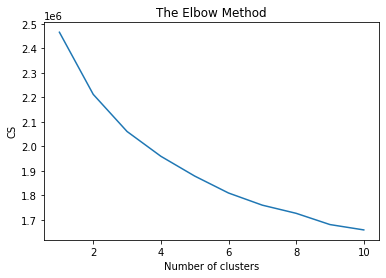

In [47]:
cs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [48]:
# 3 Clusters
# Good

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)


labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score of 3 clusters: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 182622 out of 1000000 samples were correctly labeled.
Accuracy score of 3 clusters: 0.18


In [49]:
# 4 clusters
# Optimal 

kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)


labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score of 4 clusters: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 271704 out of 1000000 samples were correctly labeled.
Accuracy score of 4 clusters: 0.27


In [50]:
# 5 clusters
# Accuracy decreases at 5 and 6

kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)


labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score of 5 clusters: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 203666 out of 1000000 samples were correctly labeled.
Accuracy score of 5 clusters: 0.20


In [51]:
# 6 clusters
# Accuracy decreases at 5 and 6

kmeans = KMeans(n_clusters=6, random_state=0)

kmeans.fit(X)


labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score of 6 clusters: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 152899 out of 1000000 samples were correctly labeled.
Accuracy score of 6 clusters: 0.15


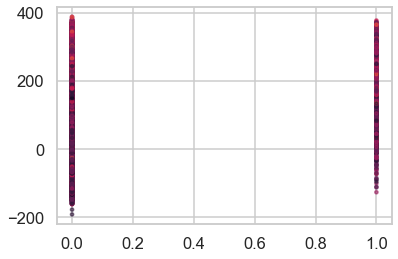

In [270]:
plt.scatter(df1.fraud_bool, df1.credit_risk_score, c=df1.customer_age, alpha = 0.6, s=10)
plt.show()

In [285]:
from sklearn.decomposition import PCA

pca = PCA(2)
data = pca.fit_transform(df)

In [286]:
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(data)

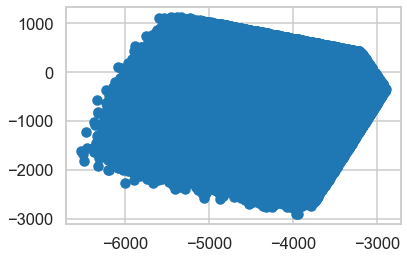

In [287]:
filtered_label0 = data[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

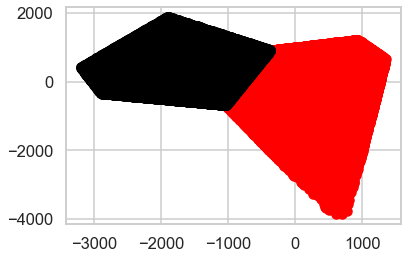

In [288]:
filtered_label2 = data[label == 2]
 
filtered_label8 = data[label == 8]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

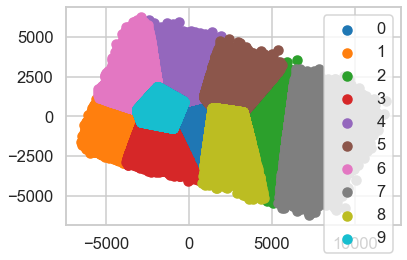

In [283]:
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)

plt.legend()
plt.show()

In [294]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [298]:
dataset = df

data_x = dataset

x_array =  np.array(data_x)
print(x_array)

[[ 5.19520362e+03 -1.89741870e+03]
 [ 7.36956149e+02 -1.43684159e+03]
 [ 2.78050804e+03 -2.34274099e+02]
 ...
 [ 3.25960893e+02 -8.83612024e+02]
 [-1.41871698e+03  2.25771601e+02]
 [ 1.06772027e+02  3.74793326e+00]]


In [299]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.63713771, 0.34388252],
       [0.39479587, 0.38102701],
       [0.50587946, 0.47801131],
       ...,
       [0.37245495, 0.4256437 ],
       [0.27761759, 0.51511294],
       [0.36054026, 0.49720724]])

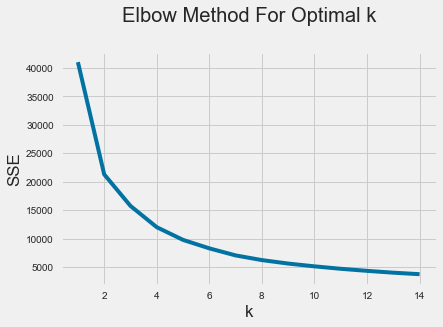

In [300]:
Sum_of_squared_distances =[]
K = range(1,15)
for k in K:
    km =KMeans(n_clusters =k)
    km =km.fit(x_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
model = KMeans(random_state=123) 
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette', timings=False)

visualizer.fit(x_scaled)    
visualizer.poof()

In [ ]:
numerics = dataset[['fraud_bool','name_email_similarity']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in numerics:
        scaler.fit(dataset[[i]])
        dataset[i] = scaler.transform(dataset[[i]])
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(dataset[['fraud_bool','name_email_similarity']])
y_predicted

In [ ]:
plt.figure(figsize=(12,8))
df1 = dataset[dataset.Cluster==0]
df2 = dataset[dataset.Cluster==1]
df3 = dataset[dataset.Cluster==2]
df4 = dataset[dataset.Cluster==3]
df5 = dataset[dataset.Cluster==4]
plt.scatter(df1['fraud_bool'],df1['name_email_similarity'],color='green', label='Target Group')
plt.scatter(df2['fraud_bool'],df2['name_email_similarity'],color='magenta', label='Sensible')
plt.scatter(df3['fraud_bool'],df3['name_email_similarity'],color='orange', label='Careless')
plt.scatter(df4['fraud_bool'],df4['name_email_similarity'],color='red', label='Careful')
plt.scatter(df5['fraud_bool'],df5['name_email_similarity'],color='blue', label='Standard')
plt.title('Clustering Result', fontweight='bold',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

## Logistic Regression

In [52]:
LR_Model = LogisticRegression()

LR_Model.fit(X_train, Y_train)

Y_pred = LR_Model.predict(X_test)

print(Y_pred)

[0 0 0 ... 0 0 0]


In [53]:
# Confusion Matrix

confusion_matrix(Y_test, Y_pred)

array([[202129,      3],
       [  2873,      5]], dtype=int64)

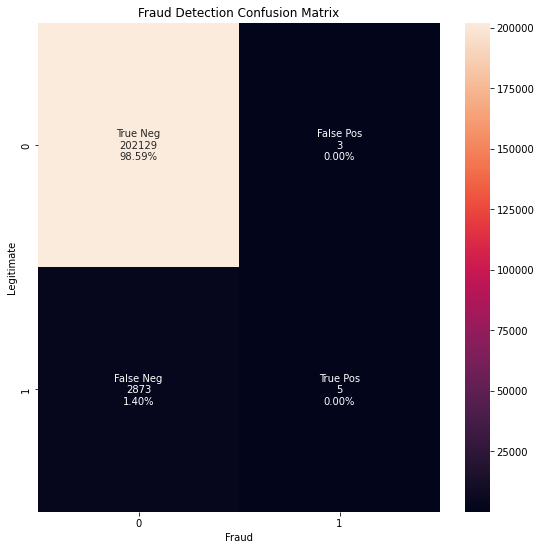

In [54]:
cm = confusion_matrix(Y_test, Y_pred)

quadrants = ["True Neg","False Pos","False Neg","True Pos"]

counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{n1}\n{n2}\n{n3}" for n1, n2, n3 in
          zip(quadrants, counts, percentages)]

labels = np.asarray(labels).reshape(2,2)



plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=labels, fmt="")
plt.title("Fraud Detection Confusion Matrix")
plt.ylabel("Legitimate")
plt.xlabel("Fraud")
plt.show()

## Statistical Description of Data

In [ ]:
# Divide data by month of new accounts, is there a mean age? income?

 fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000000 non-null  float64
 12  velocity_4w                       1000000 non-null  float64
 13  bank_branch_count_8w              1000000 non-null  int64  
 14  date_of_birth_distinct_emails_4w  1000000 non-null  int64  
 15  employment_status                 1000000 non-null  object 
 16  credit_risk_score                 1000000 non-null  int64  
 17  email_is_free                     1000000 non-null  int64  
 18  housing_status                    1000000 non-null  object 
 19  phone_home_valid                  1000000 non-null  int64  
 20  phone_mobile_valid                1000000 non-null  int64  
 21  bank_months_count                 1000000 non-null  int64  
 22  has_other_cards                   1000000 non-null  int64  
 23  proposed_credit_limit             1000000 non-null  float64
 24  foreign_request                   1000000 non-null  int64  
 25  source                            1000000 non-null  object 
 26  session_length_in_minutes         1000000 non-null  float64
 27  device_os                         1000000 non-null  object 
 28  keep_alive_session                1000000 non-null  int64  
 29  device_distinct_emails_8w         1000000 non-null  int64  
 30  device_fraud_count      

## Data by Months

In [199]:
Three_mos.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,150938.000000,150938.000000,150938.000000,150938.000000,150938.000000,150938.000000,1.509380e+05,150938.000000,150938.000000,150938.000000,...,150938.000000,150938.000000,150938.000000,150938.000000,150938.000000,150938.000000,150938.000000,150938.000000,150938.0,150938.0
mean,0.009222,0.560653,0.488124,20.278326,75.861036,32.630285,1.043354e+00,10.535644,1542.677291,5971.303658,...,0.900754,10.406385,0.265798,580.019544,0.021552,7.409289,0.522029,1.008712,0.0,3.0
std,0.095589,0.290564,0.299589,46.798704,85.275363,10.499447,5.610065e+00,22.100371,874.288374,2811.607290,...,0.298993,12.154407,0.441759,502.780597,0.145216,8.006110,0.499516,0.148032,0.0,0.0
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,8.972572e-08,-14.249211,1.000000,-14.503320,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,3.0
25%,0.000000,0.300000,0.202466,-1.000000,14.000000,30.000000,7.562439e-03,-1.146120,939.000000,3900.270411,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.148069,0.000000,1.000000,0.0,3.0
50%,0.000000,0.600000,0.473666,-1.000000,42.000000,30.000000,1.593415e-02,-0.773757,1362.000000,5946.709023,...,1.000000,2.000000,0.000000,200.000000,0.000000,5.123563,1.000000,1.000000,0.0,3.0
75%,0.000000,0.800000,0.768880,26.000000,110.000000,40.000000,2.732944e-02,16.065419,1887.000000,8094.523412,...,1.000000,21.000000,1.000000,1000.000000,0.000000,8.491831,1.000000,1.000000,0.0,3.0
max,1.000000,0.900000,1.000000,382.000000,429.000000,90.000000,7.657750e+01,113.120051,6476.000000,16412.787245,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.567848,1.000000,2.000000,0.0,3.0


## 4 Months

In [159]:
Four_mos['fraud_bool'].value_counts()

0    126239
1      1452
Name: fraud_bool, dtype: int64

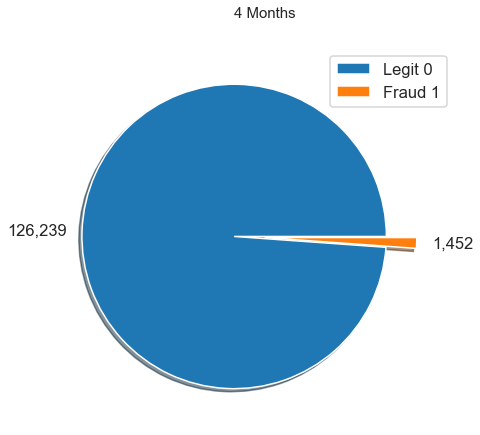

In [189]:
data4 = Four_mos['fraud_bool'].value_counts()
values = ['Legit 0', 'Fraud 1']
explode = [0.2, 0]
labels = ['126,239', '1,452']

fig = plt.figure(figsize =(10, 7))
plt.pie(data4, labels = labels, explode = explode, shadow = True)
plt.title("4 Months", fontsize=15)
plt.legend(values)
plt.show()

In [202]:
Four_mos.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,127691.000000,127691.000000,127691.000000,127691.000000,127691.000000,127691.000000,1.276910e+05,127691.000000,127691.000000,127691.000000,...,127691.000000,127691.000000,127691.000000,127691.000000,127691.000000,127691.000000,127691.000000,127691.000000,127691.0,127691.0
mean,0.011371,0.577493,0.491830,16.527289,87.328222,31.669264,1.156171e+00,7.309177,1561.006829,5320.816736,...,0.891621,10.655340,0.239085,498.953098,0.026345,6.996336,0.481725,1.009460,0.0,4.0
std,0.106028,0.287613,0.292959,44.297933,89.359839,11.134662,6.158355e+00,19.415893,893.532825,2543.612086,...,0.310859,12.206625,0.426526,463.974365,0.160159,7.620174,0.499668,0.161212,0.0,0.0
min,0.000000,0.100000,0.000011,-1.000000,-1.000000,10.000000,1.373749e-08,-15.537329,2.000000,-69.870047,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,4.0
25%,0.000000,0.300000,0.219986,-1.000000,19.000000,20.000000,6.954109e-03,-1.186898,941.000000,3462.328525,...,1.000000,-1.000000,0.000000,200.000000,0.000000,2.913133,0.000000,1.000000,0.0,4.0
50%,0.000000,0.600000,0.475201,-1.000000,52.000000,30.000000,1.468643e-02,-0.860828,1309.000000,5213.647254,...,1.000000,4.000000,0.000000,200.000000,0.000000,4.848489,0.000000,1.000000,0.0,4.0
75%,0.000000,0.800000,0.760859,12.000000,130.000000,40.000000,2.548062e-02,-0.367561,1948.000000,7158.677917,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.099193,1.000000,1.000000,0.0,4.0
max,1.000000,0.900000,0.999997,399.000000,411.000000,90.000000,7.663502e+01,112.461838,6407.000000,16528.873628,...,1.000000,32.000000,1.000000,2100.000000,1.000000,77.879704,1.000000,2.000000,0.0,4.0


## 5 months

In [160]:
Five_mos['fraud_bool'].value_counts()

0    117911
1      1411
Name: fraud_bool, dtype: int64

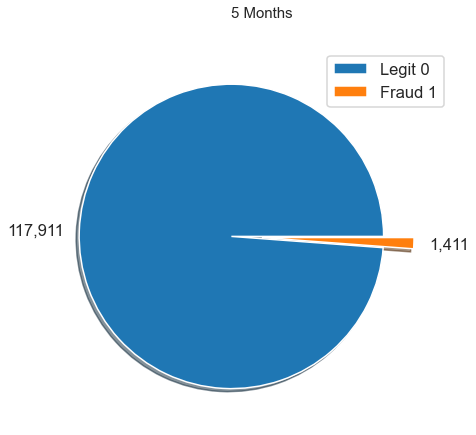

In [191]:
data5 = Five_mos['fraud_bool'].value_counts()
values = ['Legit 0', 'Fraud 1']
explode = [0.2, 0]
labels = ['117,911', '1,411']


fig = plt.figure(figsize =(10, 7))
plt.pie(data5, labels = labels, explode = explode, shadow = True)
plt.title("5 Months", fontsize=15)
plt.legend(values)
plt.show()

In [203]:
Five_mos.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,119322.000000,119322.000000,119322.000000,119322.000000,119322.000000,119322.000000,1.193220e+05,119322.000000,119322.000000,119322.000000,...,119322.000000,119322.000000,119322.000000,119322.000000,119322.000000,119322.000000,119322.000000,119322.000000,119322.0,119322.0
mean,0.011825,0.576982,0.473445,9.958206,93.297254,32.050334,6.274849e-01,7.696777,1418.439232,4737.448712,...,0.918163,11.060693,0.269154,474.985585,0.024371,6.510276,0.594207,1.010560,0.0,5.0
std,0.108099,0.286237,0.286524,35.127516,82.410148,11.061861,4.441436e+00,19.769947,829.346867,2430.865633,...,0.274118,12.093580,0.443522,447.788606,0.154199,6.823314,0.491047,0.135622,0.0,0.0
min,0.000000,0.100000,0.000006,-1.000000,-1.000000,10.000000,1.669265e-07,-14.461864,3.000000,-152.033392,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,5.0
25%,0.000000,0.300000,0.212316,-1.000000,33.000000,20.000000,7.119733e-03,-1.235045,870.000000,3016.182451,...,1.000000,1.000000,0.000000,200.000000,0.000000,2.315587,0.000000,1.000000,0.0,5.0
50%,0.000000,0.600000,0.429200,-1.000000,65.000000,30.000000,1.483792e-02,-0.903037,1145.000000,4598.168816,...,1.000000,5.000000,0.000000,200.000000,0.000000,4.576222,1.000000,1.000000,0.0,5.0
75%,0.000000,0.800000,0.734488,-1.000000,132.000000,40.000000,2.489365e-02,-0.353560,1732.000000,6101.424889,...,1.000000,25.000000,1.000000,500.000000,0.000000,8.128147,1.000000,1.000000,0.0,5.0
max,1.000000,0.900000,0.999998,369.000000,413.000000,90.000000,7.549592e+01,111.329160,6310.000000,16310.021320,...,1.000000,32.000000,1.000000,2100.000000,1.000000,77.730242,1.000000,2.000000,0.0,5.0


## 6 months

In [161]:
Six_mos['fraud_bool'].value_counts()

0    106718
1      1450
Name: fraud_bool, dtype: int64

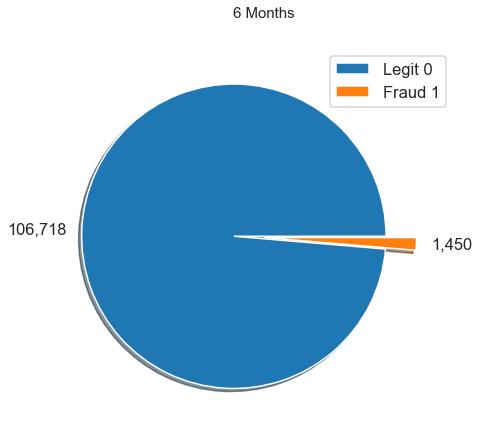

In [192]:
data6 = Six_mos['fraud_bool'].value_counts()
values = ['Legit 0', 'Fraud 1']
explode = [0.2, 0]
labels = ['106,718', '1,450']

fig = plt.figure(figsize =(10, 7))
plt.pie(data6, labels = labels, explode = explode, shadow = True)
plt.title("6 Months", fontsize=15)
plt.legend(values)
plt.show()

In [204]:
Six_mos.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,108168.000000,108168.000000,108168.000000,108168.000000,108168.000000,108168.000000,1.081680e+05,108168.000000,108168.000000,108168.000000,...,108168.000000,108168.000000,108168.000000,108168.000000,108168.000000,108168.000000,108168.000000,108168.000000,108168.0,108168.0
mean,0.013405,0.622076,0.462793,15.557817,85.937874,32.432143,8.645150e-01,9.318042,1291.078776,3924.429826,...,0.922972,10.851657,0.232148,478.115339,0.022687,6.938510,0.577481,1.007461,0.0,6.0
std,0.115002,0.276399,0.286496,41.836267,81.915889,10.987615,5.501341e+00,20.775981,769.317255,2229.440117,...,0.266638,12.091716,0.422205,429.052781,0.148904,7.128122,0.493962,0.141932,0.0,0.0
min,0.000000,0.100000,0.000055,-1.000000,-1.000000,10.000000,4.098565e-07,-15.739893,1.000000,-155.430730,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,6.0
25%,0.000000,0.400000,0.206118,-1.000000,22.000000,20.000000,7.095864e-03,-1.231657,799.000000,2324.432863,...,1.000000,1.000000,0.000000,200.000000,0.000000,2.808743,0.000000,1.000000,0.0,6.0
50%,0.000000,0.700000,0.410129,-1.000000,55.000000,30.000000,1.487810e-02,-0.871791,1071.000000,3743.839907,...,1.000000,5.000000,0.000000,200.000000,0.000000,4.929154,1.000000,1.000000,0.0,6.0
75%,0.000000,0.900000,0.724103,11.000000,128.000000,40.000000,2.527050e-02,10.906182,1526.000000,5002.966420,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.463760,1.000000,1.000000,0.0,6.0
max,1.000000,0.900000,0.999997,373.000000,414.000000,90.000000,7.644178e+01,111.563962,6284.000000,16364.113801,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.161998,1.000000,2.000000,0.0,6.0


In [249]:
Fraud_6mo = Six_mos[Six_mos['fraud_bool']==1]
Legit_6mo = Six_mos[Six_mos['fraud_bool']==0]

F6mo = Fraud_6mo.describe()
F6mo 

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1450.0,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,...,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.0,1450.0
mean,1.0,0.715034,0.382531,6.193103,101.690345,35.075862,0.939481,3.741998,1409.091034,3604.740304,...,0.898621,9.955862,0.083448,750.365517,0.055172,7.470044,0.342759,1.038621,0.0,6.0
std,0.0,0.250895,0.281557,36.596167,68.001268,10.437023,6.173479,15.603813,806.961110,2219.611954,...,0.301934,12.796738,0.276654,605.622669,0.228395,8.441703,0.474795,0.246210,0.0,0.0
min,1.0,0.100000,0.000517,-1.000000,-1.000000,10.000000,0.000005,-3.592085,41.000000,18.284813,...,0.000000,-1.000000,0.000000,200.000000,0.000000,-1.000000,0.000000,0.000000,0.0,6.0
25%,1.0,0.600000,0.152954,-1.000000,54.000000,30.000000,0.005515,-1.246639,848.250000,1970.260575,...,1.000000,-1.000000,0.000000,200.000000,0.000000,2.930654,0.000000,1.000000,0.0,6.0
50%,1.0,0.800000,0.270469,-1.000000,89.000000,40.000000,0.012259,-0.938130,1160.500000,3412.281879,...,1.000000,1.000000,0.000000,500.000000,0.000000,4.975793,0.000000,1.000000,0.0,6.0
75%,1.0,0.900000,0.634295,-1.000000,132.000000,40.000000,0.021728,-0.567386,1807.500000,4667.748312,...,1.000000,25.000000,0.000000,1500.000000,0.000000,8.324786,1.000000,1.000000,0.0,6.0
max,1.0,0.900000,0.998784,344.000000,375.000000,80.000000,75.310692,108.743871,4884.000000,14450.482114,...,1.000000,31.000000,1.000000,2000.000000,1.000000,71.625442,1.000000,2.000000,0.0,6.0


## 7 Months

In [195]:
Seven_mos['fraud_bool'].value_counts()


0    95414
1     1428
Name: fraud_bool, dtype: int64

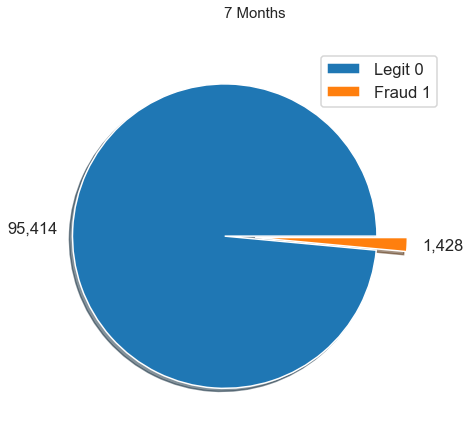

In [196]:
data7 = Seven_mos['fraud_bool'].value_counts()
values = ['Legit 0', 'Fraud 1']
explode = [0.2, 0]
labels = ['95,414', '1,428']

fig = plt.figure(figsize =(10, 7))
plt.pie(data7, labels = labels, explode = explode, shadow = True)
plt.title("7 Months", fontsize=15)
plt.legend(values)
plt.show()

In [205]:
Seven_mos.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,96842.000000,96842.000000,96842.000000,96842.000000,96842.000000,96842.000000,9.684200e+04,96842.000000,96842.000000,96842.000000,...,96842.000000,96842.000000,96842.000000,96842.000000,96842.000000,96842.000000,96842.000000,96842.000000,96842.0,96842.0
mean,0.014746,0.619012,0.483801,21.852977,69.836755,32.583590,8.979767e-01,5.573095,986.613670,3608.654894,...,0.902129,10.053727,0.192964,461.309143,0.021158,6.521336,0.649398,1.007879,0.0,7.0
std,0.120534,0.278941,0.274847,47.621441,78.212658,10.815216,5.486956e+00,16.870141,653.873767,1967.916592,...,0.297141,12.046992,0.394627,437.034700,0.143912,7.394745,0.477161,0.121644,0.0,0.0
min,0.000000,0.100000,0.000018,-1.000000,-1.000000,10.000000,8.578484e-08,-12.990237,1.000000,-174.109691,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,7.0
25%,0.000000,0.400000,0.251117,-1.000000,11.000000,20.000000,6.849214e-03,-1.196444,567.000000,2281.601991,...,1.000000,-1.000000,0.000000,200.000000,0.000000,2.253424,0.000000,1.000000,0.0,7.0
50%,0.000000,0.700000,0.485217,-1.000000,38.000000,30.000000,1.442204e-02,-0.878986,845.000000,3472.102100,...,1.000000,2.000000,0.000000,200.000000,0.000000,4.276293,1.000000,1.000000,0.0,7.0
75%,0.000000,0.900000,0.707852,29.000000,109.000000,40.000000,2.438799e-02,-0.451922,1203.000000,4540.502310,...,1.000000,25.000000,0.000000,500.000000,0.000000,7.900868,1.000000,1.000000,0.0,7.0
max,1.000000,0.900000,0.999998,374.000000,401.000000,90.000000,7.573542e+01,112.253107,6242.000000,16345.215780,...,1.000000,32.000000,1.000000,2100.000000,1.000000,83.376775,1.000000,2.000000,0.0,7.0


In [250]:
Fraud_7mo = Seven_mos[Seven_mos['fraud_bool']==1]
Legit_7mo = Seven_mos[Seven_mos['fraud_bool']==0]

F7mo = Fraud_7mo.describe()
F7mo

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1428.0,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,...,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.0,1428.0
mean,1.0,0.725770,0.393204,9.932073,93.351541,35.392157,0.913878,1.960275,1081.928571,3303.344771,...,0.893557,10.141457,0.057423,799.747899,0.034314,6.895135,0.431373,1.036415,0.0,7.0
std,0.0,0.249304,0.293973,41.249123,72.137587,10.282635,5.598925,12.076945,724.027676,1956.135409,...,0.308511,12.961736,0.232731,647.499914,0.182098,8.565019,0.495441,0.233955,0.0,0.0
min,1.0,0.100000,0.000412,-1.000000,-1.000000,10.000000,0.000008,-2.067999,31.000000,31.378663,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,0.000000,0.0,7.0
25%,1.0,0.600000,0.122636,-1.000000,42.000000,30.000000,0.005520,-1.212524,591.750000,1906.851745,...,1.000000,-1.000000,0.000000,200.000000,0.000000,2.626858,0.000000,1.000000,0.0,7.0
50%,1.0,0.900000,0.332073,-1.000000,79.000000,40.000000,0.012177,-0.916104,889.000000,3088.701546,...,1.000000,1.000000,0.000000,500.000000,0.000000,4.282030,0.000000,1.000000,0.0,7.0
75%,1.0,0.900000,0.643387,-1.000000,130.250000,40.000000,0.020933,-0.594687,1366.750000,4323.854476,...,1.000000,26.000000,0.000000,1500.000000,0.000000,7.482999,1.000000,1.000000,0.0,7.0
max,1.0,0.900000,0.999544,354.000000,386.000000,80.000000,75.535085,110.475749,5208.000000,16345.215780,...,1.000000,31.000000,1.000000,2000.000000,1.000000,68.094929,1.000000,2.000000,0.0,7.0


## Compare DF's

In [253]:
# Month 1 highest Fraud, Month 2 Lowest Fraud

Month_1_2 = F1mo.compare(F2mo, align_axis=0)
Month_1_2

fraud_bool       income  name_email_similarity  \
count self       2698.0  2698.000000            2698.000000   
      other      1198.0  1198.000000            1198.000000   
mean  self          NaN     0.647850               0.421182   
      other         NaN     0.615693               0.456558   
std   self          NaN     0.278438               0.299888   
      other         NaN     0.289217               0.312587   
min   self          NaN          NaN               0.000091   
      other         NaN          NaN               0.003238   
25%   self          NaN          NaN               0.133906   
      other         NaN          NaN               0.147752   
50%   self          NaN     0.800000               0.386748   
      other         NaN     0.700000               0.435656   
75%   self          NaN          NaN               0.696357   
      other         NaN          NaN               0.758826   
max   self          NaN          NaN               0.999986   
      other         NaN          NaN               0.999953   

             prev_address_months_count  current_address_months_count  \
count self                 2698.000000                   2698.000000   
      other                1198.000000                   1198.000000   
mean  self                    7.476649                    102.988139   
      other                   9.329716                     95.357262   
std   self                   35.521555                     82.503625   
      other                  38.365768                     83.171407   
min   self                         NaN                           NaN   
      other                        NaN                           NaN   
25%   self                         NaN                     46.000000   
      other                        NaN                     45.000000   
50%   self                         NaN                     75.000000   
      other                        NaN                     71.000000   
75%   self                         NaN                    146.000000   
      other                        NaN                    117.750000   
max   self                  341.000000                    391.000000   
      other                 357.000000                    388.000000   

             customer_age  days_since_request  intended_balcon_amount  \
count self    2698.000000         2698.000000             2698.000000   
      other   1198.000000         1198.000000             1198.000000   
mean  self      34.199407            1.410883                6.633447   
      other     34.340568            1.455144                4.145020   
std   self      10.594503            6.108841               19.620162   
      other     10.162796            5.861021               16.680762   
min   self            NaN            0.000009               -2.668160   
      other           NaN            0.000011               -3.757375   
25%   self            NaN            0.006118               -1.196265   
      other           NaN            0.006453               -1.172522   
50%   self            NaN            0.013831               -0.878004   
      other           NaN            0.013765               -0.853963   
75%   self            NaN            0.025882               -0.437346   
      other           NaN            0.027699               -0.528571   
max   self            NaN           73.656202              108.863093   
      other           NaN           72.552016              108.174445   

             zip_count_4w   velocity_6h  ...  phone_mobile_valid  \
count self    2698.000000   2698.000000  ...         2698.000000   
      other   1198.000000   1198.000000  ...         1198.000000   
mean  self    1971.537064   6673.013789  ...            0.839511   
      other   1865.691152   6120.591883  ...            0.849750   
std   self    1161.152123   3031.625259  ...            0.367127   
      other   1019.230931   3116.866425  ...            0.357466  

In [258]:
Month_1_2['bank_branch_count_8w']

count  self     2698.000000
       other    1198.000000
mean   self      153.816160
       other     141.172788
std    self      439.003173
       other     433.813289
min    self             NaN
       other            NaN
25%    self             NaN
       other            NaN
50%    self        6.000000
       other       2.000000
75%    self       19.000000
       other      15.000000
max    self     2122.000000
       other    2251.000000
Name: bank_branch_count_8w, dtype: float64

In [254]:
# F1mo highest Fraud, F3mo 2nd Lowest Fraud

F2mo.compare(F3mo, align_axis=0)

fraud_bool       income  name_email_similarity  \
count self       1198.0  1198.000000            1198.000000   
      other      1392.0  1392.000000            1392.000000   
mean  self          NaN     0.615693               0.456558   
      other         NaN     0.703951               0.390945   
std   self          NaN     0.289217               0.312587   
      other         NaN     0.259081               0.305926   
min   self          NaN          NaN               0.003238   
      other         NaN          NaN               0.000949   
25%   self          NaN     0.400000               0.147752   
      other         NaN     0.600000               0.121787   
50%   self          NaN     0.700000               0.435656   
      other         NaN     0.800000               0.284126   
75%   self          NaN          NaN               0.758826   
      other         NaN          NaN               0.707202   
max   self          NaN          NaN               0.999953   
      other         NaN          NaN               0.999312   

             prev_address_months_count  current_address_months_count  \
count self                 1198.000000                   1198.000000   
      other                1392.000000                   1392.000000   
mean  self                    9.329716                     95.357262   
      other                   7.571121                    110.657328   
std   self                   38.365768                     83.171407   
      other                  34.614535                     85.875830   
min   self                         NaN                           NaN   
      other                        NaN                           NaN   
25%   self                         NaN                     45.000000   
      other                        NaN                     50.000000   
50%   self                         NaN                     71.000000   
      other                        NaN                     85.000000   
75%   self                         NaN                    117.750000   
      other                        NaN                    155.000000   
max   self                  357.000000                    388.000000   
      other                 331.000000                    390.000000   

             customer_age  days_since_request  intended_balcon_amount  \
count self    1198.000000         1198.000000             1198.000000   
      other   1392.000000         1392.000000             1392.000000   
mean  self      34.340568            1.455144                4.145020   
      other     36.250000            1.137834                5.235721   
std   self      10.162796            5.861021               16.680762   
      other      9.990110            6.519204               18.300494   
min   self            NaN            0.000011               -3.757375   
      other           NaN            0.000011               -8.581278   
25%   self            NaN            0.006453               -1.172522   
      other           NaN            0.005505               -1.155860   
50%   self      30.000000            0.013765               -0.853963   
      other     40.000000            0.012127               -0.855032   
75%   self            NaN            0.027699               -0.528571   
      other           NaN            0.022425               -0.508849   
max   self            NaN           72.552016              108.174445   
      other           NaN           74.868828              104.683199   

             zip_count_4w   velocity_6h  ...  phone_mobile_valid  \
count self    1198.000000   1198.000000  ...         1198.000000   
      other   1392.000000   1392.000000  ...         1392.000000   
mean  self    1865.691152   6120.591883  ...            0.849750   
      other   1675.538075   5563.052687  ...            0.862787   
std   self    1019.230931   3116.866425  ...            0.357466   
      other    914.789851   2771.619812  ...            0.344195  

In [251]:
F6mo.compare(F7mo, align_axis=0)

fraud_bool       income  name_email_similarity  \
count self       1450.0  1450.000000            1450.000000   
      other      1428.0  1428.000000            1428.000000   
mean  self          NaN     0.715034               0.382531   
      other         NaN     0.725770               0.393204   
std   self          NaN     0.250895               0.281557   
      other         NaN     0.249304               0.293973   
min   self          NaN          NaN               0.000517   
      other         NaN          NaN               0.000412   
25%   self          NaN          NaN               0.152954   
      other         NaN          NaN               0.122636   
50%   self          NaN     0.800000               0.270469   
      other         NaN     0.900000               0.332073   
75%   self          NaN          NaN               0.634295   
      other         NaN          NaN               0.643387   
max   self          NaN          NaN               0.998784   
      other         NaN          NaN               0.999544   

             prev_address_months_count  current_address_months_count  \
count self                 1450.000000                   1450.000000   
      other                1428.000000                   1428.000000   
mean  self                    6.193103                    101.690345   
      other                   9.932073                     93.351541   
std   self                   36.596167                     68.001268   
      other                  41.249123                     72.137587   
min   self                         NaN                           NaN   
      other                        NaN                           NaN   
25%   self                         NaN                     54.000000   
      other                        NaN                     42.000000   
50%   self                         NaN                     89.000000   
      other                        NaN                     79.000000   
75%   self                         NaN                    132.000000   
      other                        NaN                    130.250000   
max   self                  344.000000                    375.000000   
      other                 354.000000                    386.000000   

             customer_age  days_since_request  intended_balcon_amount  \
count self    1450.000000         1450.000000             1450.000000   
      other   1428.000000         1428.000000             1428.000000   
mean  self      35.075862            0.939481                3.741998   
      other     35.392157            0.913878                1.960275   
std   self      10.437023            6.173479               15.603813   
      other     10.282635            5.598925               12.076945   
min   self            NaN            0.000005               -3.592085   
      other           NaN            0.000008               -2.067999   
25%   self            NaN            0.005515               -1.246639   
      other           NaN            0.005520               -1.212524   
50%   self            NaN            0.012259               -0.938130   
      other           NaN            0.012177               -0.916104   
75%   self            NaN            0.021728               -0.567386   
      other           NaN            0.020933               -0.594687   
max   self            NaN           75.310692              108.743871   
      other           NaN           75.535085              110.475749   

             zip_count_4w   velocity_6h  ...  phone_mobile_valid  \
count self    1450.000000   1450.000000  ...         1450.000000   
      other   1428.000000   1428.000000  ...         1428.000000   
mean  self    1409.091034   3604.740304  ...            0.898621   
      other   1081.928571   3303.344771  ...            0.893557   
std   self     806.961110   2219.611954  ...            0.301934   
      other    724.027676   1956.135409  ...            0.308511  

In [264]:
Legit_1_2 = L1mo.compare(L2mo, align_axis=0)
Legit_1_2

fraud_bool         income  name_email_similarity  \
count self     257362.0  257362.000000           2.573620e+05   
      other    135781.0  135781.000000           1.357810e+05   
mean  self          NaN       0.531208           5.047800e-01   
      other         NaN       0.495080           5.389143e-01   
std   self          NaN       0.291060           2.842004e-01   
      other         NaN       0.293495           2.884776e-01   
min   self          NaN            NaN           1.239362e-05   
      other         NaN            NaN           5.024707e-08   
25%   self          NaN            NaN           2.438615e-01   
      other         NaN            NaN           3.003885e-01   
50%   self          NaN       0.600000           5.186878e-01   
      other         NaN       0.500000           5.384371e-01   
75%   self          NaN            NaN           7.509654e-01   
      other         NaN            NaN           8.204093e-01   
max   self          NaN            NaN           9.999994e-01   
      other         NaN            NaN           9.999982e-01   

             prev_address_months_count  current_address_months_count  \
count self               257362.000000                 257362.000000   
      other              135781.000000                 135781.000000   
mean  self                   16.380981                     89.452095   
      other                  18.812617                     76.440054   
std   self                   44.067050                     91.372924   
      other                  44.712718                     85.644636   
min   self                         NaN                           NaN   
      other                        NaN                           NaN   
25%   self                         NaN                     22.000000   
      other                        NaN                     14.000000   
50%   self                         NaN                     53.000000   
      other                        NaN                     46.000000   
75%   self                   11.000000                    138.000000   
      other                  25.000000                    101.000000   
max   self                  362.000000                    426.000000   
      other                 372.000000                    423.000000   

              customer_age  days_since_request  intended_balcon_amount  \
count self   257362.000000        2.573620e+05           257362.000000   
      other  135781.000000        1.357810e+05           135781.000000   
mean  self       31.394456        1.058205e+00                9.562966   
      other      31.699060        1.571403e+00                9.143547   
std   self       11.005275        4.920143e+00               20.546857   
      other      10.664070        6.224342e+00               19.864754   
min   self             NaN        3.112791e-08              -14.981743   
      other            NaN        4.284950e-08              -13.154917   
25%   self             NaN        6.983235e-03               -1.170599   
      other            NaN        7.576074e-03               -1.118140   
50%   self             NaN        1.486107e-02               -0.797957   
      other            NaN        1.612931e-02               -0.759816   
75%   self             NaN        2.630771e-02               14.319778   
      other            NaN        2.945863e-02               12.460070   
max   self             NaN        7.635261e+01              112.516052   
      other            NaN        7.582081e+01              112.099477   

              zip_count_4w    velocity_6h  ...  phone_mobile_valid  \
count self   257362.000000  257362.000000  ...       257362.000000   
      other  135781.000000  135781.000000  ...       135781.000000   
mean  self     1931.324725    7138.894428  ...            0.886937   
      other    1717.763796    6476.107653  ...            0.884513   
std   self     1218.924690    3139.219521  ...            0.316670   
   

In [266]:
Legit_1_2['velocity_4w']

count  self     257362.000000
       other    135781.000000
mean   self       5800.103769
       other      5357.711985
std    self        676.521319
       other       373.622406
min    self       2975.565129
       other      3016.720977
25%    self       5380.018859
       other      5166.368082
50%    self       5683.924240
       other      5462.087024
75%    self       6354.853148
       other      5592.028911
max    self       7019.201030
       other      6938.884940
Name: velocity_4w, dtype: float64

In [267]:
L1mo.compare(F1mo, align_axis=0)

fraud_bool         income  name_email_similarity  \
count self     257362.0  257362.000000          257362.000000   
      other      2698.0    2698.000000            2698.000000   
mean  self          0.0       0.531208               0.504780   
      other         1.0       0.647850               0.421182   
std   self          NaN       0.291060               0.284200   
      other         NaN       0.278438               0.299888   
min   self          0.0            NaN               0.000012   
      other         1.0            NaN               0.000091   
25%   self          0.0       0.200000               0.243861   
      other         1.0       0.400000               0.133906   
50%   self          0.0       0.600000               0.518688   
      other         1.0       0.800000               0.386748   
75%   self          0.0       0.800000               0.750965   
      other         1.0       0.900000               0.696357   
max   self          0.0            NaN               0.999999   
      other         1.0            NaN               0.999986   

             prev_address_months_count  current_address_months_count  \
count self               257362.000000                 257362.000000   
      other                2698.000000                   2698.000000   
mean  self                   16.380981                     89.452095   
      other                   7.476649                    102.988139   
std   self                   44.067050                     91.372924   
      other                  35.521555                     82.503625   
min   self                         NaN                           NaN   
      other                        NaN                           NaN   
25%   self                         NaN                     22.000000   
      other                        NaN                     46.000000   
50%   self                         NaN                     53.000000   
      other                        NaN                     75.000000   
75%   self                   11.000000                    138.000000   
      other                  -1.000000                    146.000000   
max   self                  362.000000                    426.000000   
      other                 341.000000                    391.000000   

              customer_age  days_since_request  intended_balcon_amount  \
count self   257362.000000        2.573620e+05           257362.000000   
      other    2698.000000        2.698000e+03             2698.000000   
mean  self       31.394456        1.058205e+00                9.562966   
      other      34.199407        1.410883e+00                6.633447   
std   self       11.005275        4.920143e+00               20.546857   
      other      10.594503        6.108841e+00               19.620162   
min   self             NaN        3.112791e-08              -14.981743   
      other            NaN        8.943780e-06               -2.668160   
25%   self       20.000000        6.983235e-03               -1.170599   
      other      30.000000        6.117652e-03               -1.196265   
50%   self             NaN        1.486107e-02               -0.797957   
      other            NaN        1.383125e-02               -0.878004   
75%   self             NaN        2.630771e-02               14.319778   
      other            NaN        2.588154e-02               -0.437346   
max   self       90.000000        7.635261e+01              112.516052   
      other      80.000000        7.365620e+01              108.863093   

              zip_count_4w    velocity_6h  ...  phone_mobile_valid  \
count self   257362.000000  257362.000000  ...       257362.000000   
      other    2698.000000    2698.000000  ...         2698.000000   
mean  self     1931.324725    7138.894428  ...            0.886937   
      other    1971.537064    6673.013789  ...            0.839511   
std   self     1218.924690    3139.219521  ...            0.316670   
   

# Data by Fraud

In [110]:
# Data split

Fraud_df = df1[df1['fraud_bool']==1]
Legitimate_df = df1[df1['fraud_bool']==0]

In [114]:
Fraud_df.head(2)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
65,1,0.9,0.207248,-1,59,30,0.00923,-1.056407,AB,678,...,0,200.0,0,INTERNET,5.345529,other,0,1,0,4
82,1,0.9,0.071223,185,11,40,0.00345,-1.111867,AD,1131,...,0,200.0,0,INTERNET,2.305421,other,1,1,0,0


In [113]:
Legitimate_df.head(2)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.6,0.252681,-1,188,20,0.021614,-0.266603,AC,2596,...,0,1000.0,1,INTERNET,7.634858,linux,0,1,0,5
1,0,0.9,0.185206,-1,51,30,0.001696,-1.191015,AD,898,...,0,1500.0,0,INTERNET,5.408299,other,0,1,0,4


In [105]:
# Age

F_Age = Fraud_df['customer_age'].mean()
L_Age = Legitimate_df['customer_age'].mean()

print("Average age listed for customers of fraudulent accounts", round(F_Age))
print("Average age listed for customers of legitimate accounts", round(L_Age))

Average age listed for customers of fraudulent accounts 35
Average age listed for customers of legitimate accounts 32


In [106]:
# current_address_months_count

F_current_address_months_count = Fraud_df['current_address_months_count'].mean()
L_current_address_months_count = Legitimate_df['current_address_months_count'].mean()

print("Average income listed for customers of fraudulent accounts", round(F_current_address_months_count))
print("Average income listed for customers of legitimate accounts", round(L_current_address_months_count))

Average income listed for customers of fraudulent accounts 102
Average income listed for customers of legitimate accounts 83


In [107]:
# prev_address_months_count

F_prev_address_months_count = Fraud_df['prev_address_months_count'].mean()
L_prev_address_months_count = Legitimate_df['prev_address_months_count'].mean()

print("Average num of mos at previous address listed for customers of fraudulent accounts", round(F_prev_address_months_count))
print("Average num of mos at previous address listed for customers of legitimate accounts", round(L_prev_address_months_count))

Average num of mos at previous address listed for customers of fraudulent accounts 7
Average num of mos at previous address listed for customers of legitimate accounts 17


In [108]:
# current_address_months_count

F_current_address_months_count = Fraud_df['current_address_months_count'].mean()
L_current_address_months_count = Legitimate_df['current_address_months_count'].mean()

print("Average num of mos at previous address listed for customers of fraudulent accounts", round(F_current_address_months_count))
print("Average num of mos at current address listed for customers of legitimate accounts", round(L_current_address_months_count))

Average num of mos at previous address listed for customers of fraudulent accounts 102
Average num of mos at current address listed for customers of legitimate accounts 83


In [115]:
# days_since_request

F_days_since_request = Fraud_df['days_since_request'].mean()
L_days_since_request = Legitimate_df['days_since_request'].mean()

print("Average num of mos at previous address listed for customers of fraudulent accounts", round(F_days_since_request))
print("Average num of mos at current address listed for customers of legitimate accounts", round(L_days_since_request))

Average num of mos at previous address listed for customers of fraudulent accounts 1
Average num of mos at current address listed for customers of legitimate accounts 1


In [140]:
# FRAUD days_since_request_count 

F_days_since_request_count = pd.DataFrame(Fraud_df['days_since_request'].sort_values(ascending=False))
F_days_since_request_count.nunique
F_days_since_request_count.head(20)

,days_since_request
812819,75.535085
859786,75.495921
44133,75.310692
723945,74.868828
47549,74.456546
10412,74.136234
874825,73.846624
707519,73.830406
749365,73.781029
377601,73.656202


In [145]:
# LEGITIMATE days_since_request_count 

L_days_since_request_count = pd.DataFrame(Legitimate_df['days_since_request'].sort_values(ascending=False))
L_days_since_request_count.nunique
L_days_since_request_count.head(20)

,days_since_request
705197,76.635022
479589,76.577505
251405,76.441784
930118,76.352614
27939,76.286220
88016,76.155085
995918,76.039965
261284,75.820808
706374,75.781100
342366,75.759804


## Correlations

In [60]:
target0_df=df1.loc[df1["fraud_bool"]==0]
target1_df=df1.loc[df1["fraud_bool"]==1]

In [67]:
print("Correlations among Legititmate Accounts")

cor = target0_df.corr()

corrdf = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Correlations among Legititmate Accounts


,Var1,Var2,Correlation
713,month,velocity_4w,0.85
554,proposed_credit_limit,credit_risk_score,0.60
712,month,velocity_24h,0.55
307,velocity_4w,velocity_24h,0.54
279,velocity_24h,velocity_6h,0.47
711,month,velocity_6h,0.41
306,velocity_4w,velocity_6h,0.40
356,date_of_birth_distinct_emails_4w,customer_age,0.37
305,velocity_4w,zip_count_4w,0.30
710,month,zip_count_4w,0.29


In [66]:
print("Correlations among Fraud Accounts")
corr = target1_df.corr()

corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Correlations among Fraud Accounts


,Var1,Var2,Correlation
713,month,velocity_4w,0.85
554,proposed_credit_limit,credit_risk_score,0.64
712,month,velocity_24h,0.57
307,velocity_4w,velocity_24h,0.57
279,velocity_24h,velocity_6h,0.48
711,month,velocity_6h,0.42
306,velocity_4w,velocity_6h,0.41
356,date_of_birth_distinct_emails_4w,customer_age,0.39
475,phone_mobile_valid,phone_home_valid,0.33
305,velocity_4w,zip_count_4w,0.28


In [344]:
# plt.figure(figsize=(15,15),dpi = 150)
# plt.xticks(rotation=90)
# sns.barplot(data =df1, y='income',hue='housing_status',x='customer_age')
# plt.title('Housing Status, Age, Income')
# plt.show()

In [343]:
# plt.figure(figsize=(15,15),dpi = 150)
# plt.xticks(rotation=90)
# sns.barplot(data =df1, y='income',hue='housing_status',x='proposed_credit_limit')
# plt.title('Housing Status, Age, Income')
# plt.show()

# Undersampling Oversampling

In [390]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

X = df1.drop('fraud_bool', axis=1)
y = df1['fraud_bool']

splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_data, test_data in splits.split(X, y):
    print("Train:", train_data, "Test:", test_data)
    original_Xtrain, original_Xtest = X.iloc[train_data], X.iloc[test_data]
    original_ytrain, original_ytest = y.iloc[train_data], y.iloc[test_data]


original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values


train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [195978 196040 196062 ... 999997 999998 999999] Test: [     0      1      2 ... 200046 200047 200048]
Train: [     0      1      2 ... 999997 999998 999999] Test: [195978 196040 196062 ... 402211 402236 402432]
Train: [     0      1      2 ... 999997 999998 999999] Test: [399974 399975 399976 ... 600030 600031 600032]
Train: [     0      1      2 ... 999997 999998 999999] Test: [597503 597533 597557 ... 800233 800473 800642]
Train: [     0      1      2 ... 800233 800473 800642] Test: [799995 799996 799997 ... 999997 999998 999999]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.98897125 0.01102875]
[0.98897 0.01103]


In [371]:
df1 = df1.sample(frac=1)


fraud_df = df1.loc[df1['fraud_bool'] == 1]
legit_df = df1.loc[df1['fraud_bool'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, legit_df])


new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,fraud_bool,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,scaled_income
963286,1,0.766207,-1,68,40,0.016455,15.286096,AA,1668,8590.166903,...,0,1500.0,0,INTERNET,29.323970,other,0,1,0,0.00
395839,1,0.877647,-1,325,40,0.006066,-1.332315,AC,4310,6997.438817,...,0,200.0,0,INTERNET,6.798067,linux,1,1,0,-0.25
314715,1,0.041733,11,44,20,0.010988,-1.314216,AB,2472,7130.519604,...,0,200.0,0,INTERNET,7.413189,windows,0,1,0,-0.50
374580,1,0.249809,126,0,40,0.005160,-0.404296,AC,478,9888.786811,...,0,1000.0,0,INTERNET,5.912415,windows,0,1,0,-0.25
193690,1,0.095601,-1,53,40,0.006080,-1.130149,AB,1574,691.803997,...,0,1500.0,0,INTERNET,16.284554,windows,0,1,0,0.50


1    0.957295
0    0.042705
Name: fraud_bool, dtype: float64


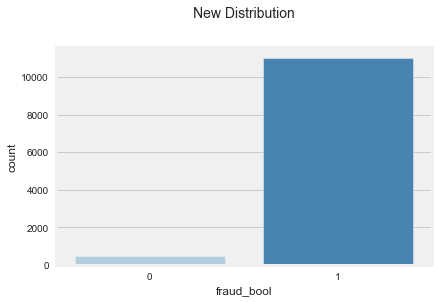

In [392]:

print(new_df['fraud_bool'].value_counts()/len(new_df))



sns.countplot('fraud_bool', data=new_df, palette='Blues')
plt.title('New Distribution', fontsize=14)
plt.show()

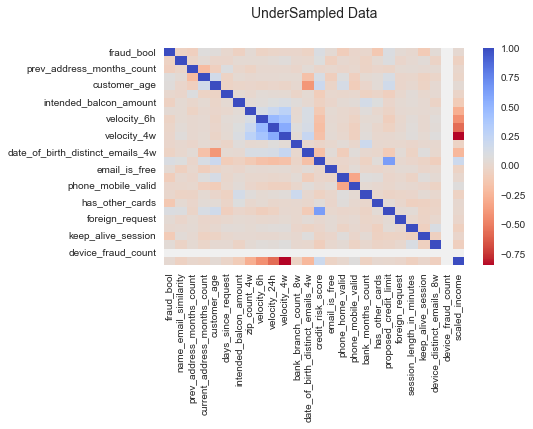

In [386]:
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('UnderSampled Data', fontsize=14)
plt.show()